In [198]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report, precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [199]:
data = pd.read_excel(r"C:\Users\320118090\Desktop\School\Thesis\Data\DataThesis.xlsx")

In [200]:
data.dtypes

Sold_To_Party                                  int64
Modality                                      object
Market                                        object
ContractType                                  object
DurationInDays                                 int64
START_DATE                            datetime64[ns]
END_DATE                              datetime64[ns]
Main_Equipment_Age_Bucket_In_Years            object
Sales_Year                                     int64
Contract_Month                                object
Churn                                          int64
SALES_VALUE_EUR                              float64
Sales Quartile                                object
Partner Type                                  object
CONTRACT_ID                                   object
EOL_Reached                                    int64
dtype: object

In [201]:
data = data.drop(['START_DATE', 'END_DATE'], axis=1)

In [202]:
data.head()

,Sold_To_Party,Modality,Market,ContractType,DurationInDays,Main_Equipment_Age_Bucket_In_Years,Sales_Year,Contract_Month,Churn,SALES_VALUE_EUR,Sales Quartile,Partner Type,CONTRACT_ID,EOL_Reached
0,340168,AMI,AFI,SILVER,365,11-15 years,2018,April,0,1170.84,Q4,Distributor Sales and Service,40851673-80,0
1,340168,AMI,AFI,SILVER,365,11-15 years,2018,March,0,1051.71,Q4,Distributor Sales and Service,40964503-70,0
2,842044,IGT-S Fixed,CEE,SILVER,1826,16+ years,2018,March,1,1119.44,Q4,Distributor Sales and Service,41584667-10,0
3,340168,AMI,AFI,SILVER,366,11-15 years,2020,March,1,1170.13,Q4,Distributor Sales and Service,40964503-90,0
4,340168,AMI,AFI,SILVER,365,11-15 years,2018,August,0,6341.08,Q4,Distributor Sales and Service,40981828-80,0


In [203]:
data['Sales_Year'] = data['Sales_Year'].astype(object)

In [253]:
data['EOL_Reached'] = data['EOL_Reached'].astype(int)

In [ ]:
data['EOL_Reached'] = data['EOL_Reached'].astype(int)

In [205]:
data = data.drop(['CONTRACT_ID'], axis=1)

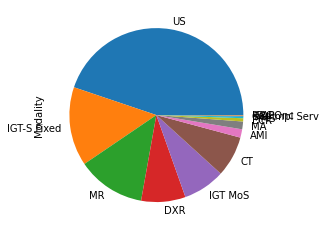

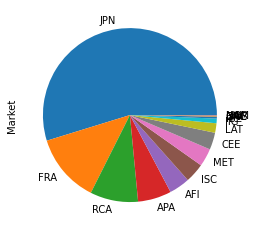

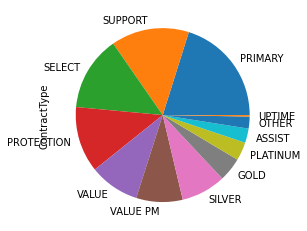

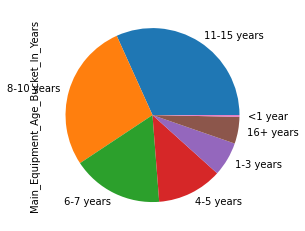

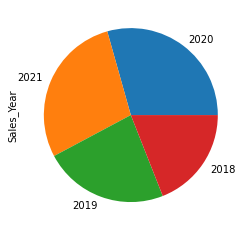

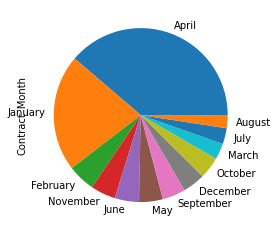

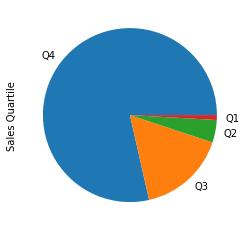

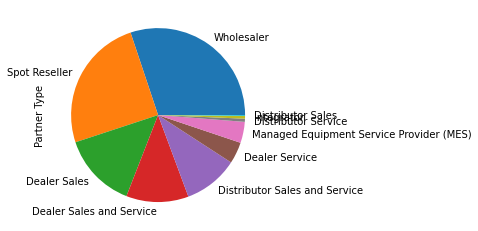

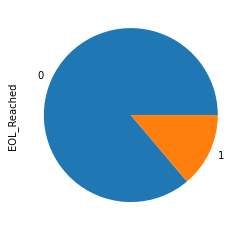

In [206]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

<AxesSubplot:xlabel='SALES_VALUE_EUR', ylabel='Density'>

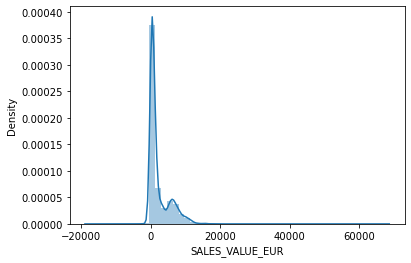

In [207]:
plt.figure()
sns.distplot(data['SALES_VALUE_EUR'])

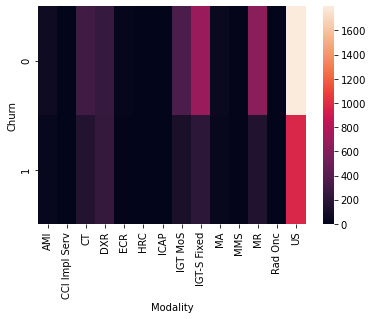

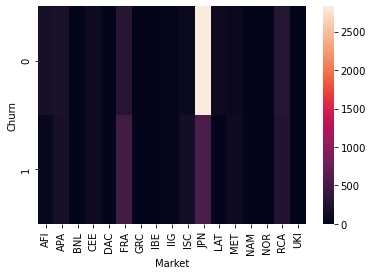

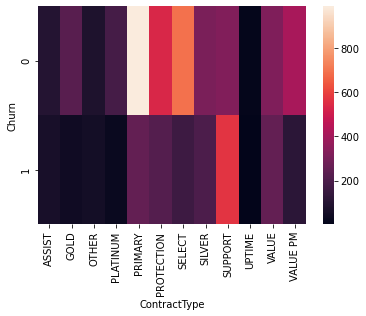

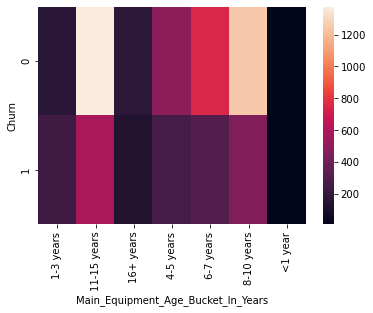

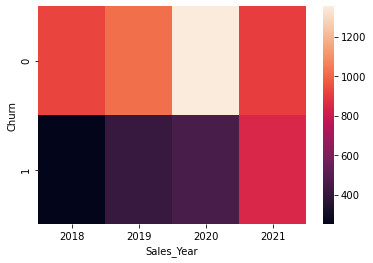

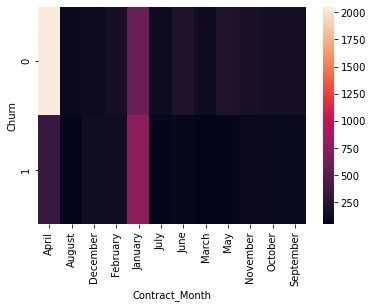

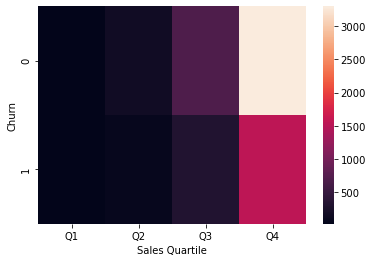

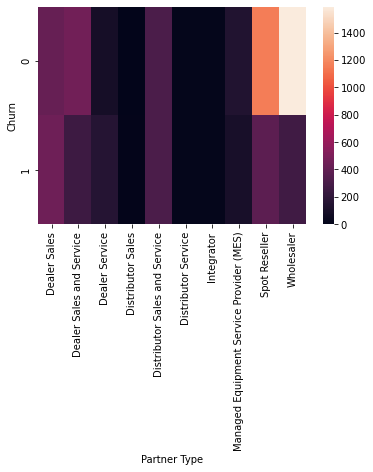

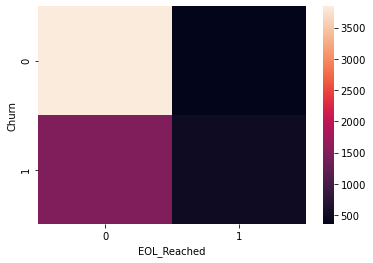

In [208]:
for col in data.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(data['Churn'], data[col]), fmt='d')

In [209]:
target_count = data.Churn.value_counts()

Class 0: 4201
Class 1: 1979
Proportion: 2.12 : 1


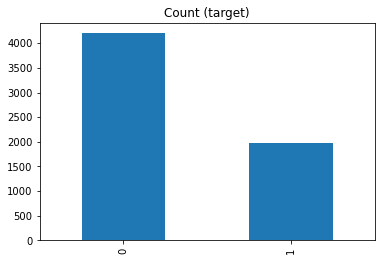

In [210]:

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

# Binary Data Encoding 

In [211]:
data = pd.get_dummies(data,columns=['Sales Quartile'],prefix='Sales Quartile')

In [212]:
data1 = data.copy()

In [213]:
import category_encoders as ce

In [214]:
encoder = ce.BinaryEncoder(cols=['Modality', 'Partner Type', 'Market', 'ContractType', 
                                  'Main_Equipment_Age_Bucket_In_Years',
                                 'Sales_Year', 'Contract_Month'],return_df=True)

In [215]:
df = encoder.fit_transform(data1)

In [216]:
for col in df.columns:
    print(col)

Sold_To_Party
Modality_0
Modality_1
Modality_2
Modality_3
Modality_4
Market_0
Market_1
Market_2
Market_3
Market_4
Market_5
ContractType_0
ContractType_1
ContractType_2
ContractType_3
ContractType_4
DurationInDays
Main_Equipment_Age_Bucket_In_Years_0
Main_Equipment_Age_Bucket_In_Years_1
Main_Equipment_Age_Bucket_In_Years_2
Main_Equipment_Age_Bucket_In_Years_3
Sales_Year_0
Sales_Year_1
Sales_Year_2
Contract_Month_0
Contract_Month_1
Contract_Month_2
Contract_Month_3
Contract_Month_4
Churn
SALES_VALUE_EUR
Partner Type_0
Partner Type_1
Partner Type_2
Partner Type_3
Partner Type_4
EOL_Reached
Sales Quartile_Q1
Sales Quartile_Q2
Sales Quartile_Q3
Sales Quartile_Q4


In [217]:
#df = df.drop(['Sold_To_Party'], axis=1)

In [218]:
features = ['Modality_0', 'Modality_1', 'Modality_2','Modality_3', 'Modality_4', 'Market_0', 'Market_1',
                        'Market_2', 'Market_3', 'Market_4', 'Market_5', 'ContractType_0' , 'ContractType_1',
                        'ContractType_2', 'ContractType_3', 'ContractType_4', 'DurationInDays', 
                        'Main_Equipment_Age_Bucket_In_Years_0', 'Main_Equipment_Age_Bucket_In_Years_1',
                        'Main_Equipment_Age_Bucket_In_Years_2', 'Main_Equipment_Age_Bucket_In_Years_3',
                        'Sales_Year_0', 'Sales_Year_1', 'Sales_Year_2', 'Contract_Month_0', 'Contract_Month_1',
                        'Contract_Month_2', 'Contract_Month_3', 'Contract_Month_4', 'SALES_VALUE_EUR',
                        'Sales Quartile_Q1', 'Sales Quartile_Q2', 'Sales Quartile_Q3', 'Sales Quartile_Q4', 'Partner Type_0',
                        'Partner Type_1', 'Partner Type_2', 'Partner Type_3', 'Partner Type_4', 'EOL_Reached']

# Random undersampling

In [25]:
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [26]:
count_class_0, count_class_1 = df.Churn.value_counts()

Random under-sampling:
0    1979
1    1979
Name: Churn, dtype: int64
(3958, 42)


,Sold_To_Party,Modality_0,Modality_1,Modality_2,Modality_3,Modality_4,Market_0,Market_1,Market_2,Market_3,...,Partner Type_0,Partner Type_1,Partner Type_2,Partner Type_3,Partner Type_4,EOL_Reached,Sales Quartile_Q1,Sales Quartile_Q2,Sales Quartile_Q3,Sales Quartile_Q4
284,94155061,0,0,0,1,0,0,0,1,1,...,0,0,1,1,1,0,0,0,0,1
4472,94478839,0,0,1,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
1984,94011593,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
923,94009510,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4991,94009158,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


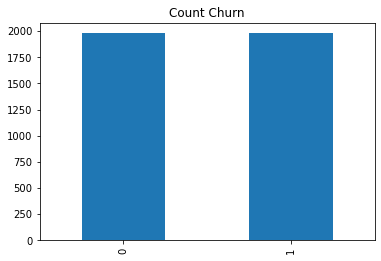

In [27]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.Churn.value_counts())

df_under.Churn.value_counts().plot(kind='bar', title='Count Churn');

print(df_under.shape)

df_under.head()

## Splitting undersampled dataset

In [196]:
X_under = df_under[features]
y_under = df_under['Churn']

In [29]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.2, random_state=1)

X_under_train, X_under_val, y_under_train, y_under_val = train_test_split(X_under_train, y_under_train, test_size=0.25, random_state=1)

In [58]:
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=2000, random_state=25),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=25),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=25)
}

## Baseline agorithms

In [59]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_under_train, y_under_train)
    accuracy = cross_val_score(classifier, X_under_train, y_under_train, scoring = 'accuracy',cv=5)
    print("Classifiers: ", classifier.__class__.__name__, 
          "Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Classifiers:  LogisticRegression Accuracy of Model with Cross Validation is: 69.33510992671552
Classifiers:  KNeighborsClassifier Accuracy of Model with Cross Validation is: 68.53573173439929
Classifiers:  SVC Accuracy of Model with Cross Validation is: 59.68723073506551
Classifiers:  DecisionTreeClassifier Accuracy of Model with Cross Validation is: 75.94812347324007


In [104]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 25,
 'splitter': 'best'}

# Tuning hyper-paramenters

In [60]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1' , 'l2'], 'C': [0.001, 0.01, 1, 10, 100, 1000], "solver" : ['newton-cg', 'lbfgs', 'liblinear'] }



grid_log_reg = GridSearchCV(LogisticRegression(max_iter=5000, random_state=25), log_reg_params)
grid_log_reg.fit(X_under_train, y_under_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

log_reg_score = cross_val_score(log_reg, X_under_val, y_under_val, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  69.45%


In [33]:
print(features)

['Modality_0', 'Modality_1', 'Modality_2', 'Modality_3', 'Modality_4', 'Market_0', 'Market_1', 'Market_2', 'Market_3', 'Market_4', 'Market_5', 'ContractType_0', 'ContractType_1', 'ContractType_2', 'ContractType_3', 'ContractType_4', 'DurationInDays', 'Main_Equipment_Age_Bucket_In_Years_0', 'Main_Equipment_Age_Bucket_In_Years_1', 'Main_Equipment_Age_Bucket_In_Years_2', 'Main_Equipment_Age_Bucket_In_Years_3', 'Sales_Year_0', 'Sales_Year_1', 'Sales_Year_2', 'Contract_Month_0', 'Contract_Month_1', 'Contract_Month_2', 'Contract_Month_3', 'Contract_Month_4', 'SALES_VALUE_EUR', 'Sales Quartile_Q1', 'Sales Quartile_Q2', 'Sales Quartile_Q3', 'Sales Quartile_Q4', 'Partner Type_0', 'Partner Type_1', 'Partner Type_2', 'Partner Type_3', 'Partner Type_4', 'EOL_Reached']


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.49815
Feature: 2, Score: 0.26079
Feature: 3, Score: -0.19003
Feature: 4, Score: 0.05861
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.11215
Feature: 7, Score: 0.61980
Feature: 8, Score: 1.02348
Feature: 9, Score: 0.36795
Feature: 10, Score: -0.58187
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.36447
Feature: 13, Score: 0.16879
Feature: 14, Score: 0.01469
Feature: 15, Score: 0.51093
Feature: 16, Score: 0.00059
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.42532
Feature: 19, Score: -0.49684
Feature: 20, Score: -0.66003
Feature: 21, Score: 1.33690
Feature: 22, Score: 0.24724
Feature: 23, Score: 0.38835
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.54839
Feature: 26, Score: 0.44067
Feature: 27, Score: 0.22170
Feature: 28, Score: 0.02687
Feature: 29, Score: -0.00001
Feature: 30, Score: 0.62337
Feature: 31, Score: -0.21806
Feature: 32, Score: -0.46619
Feature: 33, Score: -0.26099
Feature: 34, Score: 0.00000
Feature: 35, Score: -

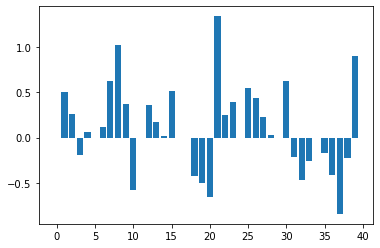

In [34]:
from sklearn.datasets import make_classification
from matplotlib import pyplot

importance_logreg = log_reg.coef_[0]

for i,v in enumerate(importance_logreg):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
pyplot.bar([x for x in range(len(importance_logreg))], importance_logreg)
pyplot.show()

In [48]:
knears_params = {"n_neighbors": [1,2,3,5,7,9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_under_train, y_under_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

knears_score = cross_val_score(knears_neighbors, X_under_val, y_under_val, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 69.2%


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00052
Feature: 3, Score: -0.00013
Feature: 4, Score: -0.00006
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00016
Feature: 9, Score: -0.00058
Feature: 10, Score: -0.00010
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.00039
Feature: 13, Score: -0.00003
Feature: 14, Score: -0.00023
Feature: 15, Score: -0.00039
Feature: 16, Score: 0.17288
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00120
Feature: 19, Score: 0.00298
Feature: 20, Score: -0.00078
Feature: 21, Score: 0.00013
Feature: 22, Score: -0.00016
Feature: 23, Score: 0.00165
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00010
Feature: 26, Score: 0.00042
Feature: 27, Score: 0.00026
Feature: 28, Score: 0.00081
Feature: 29, Score: 0.24214
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00023
Feature: 32, Score: 0.00026
Feature: 33, Score: 0.00045
Feature: 34, Score: 0.00000
Feature: 35, Score

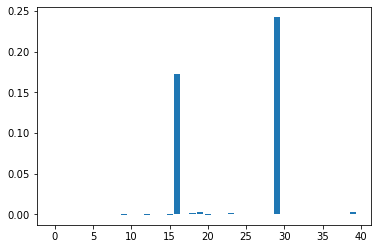

In [36]:
from sklearn.inspection import permutation_importance

results = permutation_importance(knears_neighbors, X, y, scoring='accuracy')
importance_knn = results.importances_mean

for i,v in enumerate(importance_knn):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
pyplot.bar([x for x in range(len(importance_knn))], importance_knn)
pyplot.show()

In [49]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['poly', 'rbf']}
grid_svc = GridSearchCV(SVC(random_state=25), svc_params)
grid_svc.fit(X_under_train, y_under_train)

# SVC best estimator
svc = grid_svc.best_estimator_

svc_score = cross_val_score(svc, X_under_val, y_under_val, cv=3)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 56.94%


In [111]:
# Decision Tree Classifier
dt_params = {"criterion": ["gini", "entropy"],  "max_depth": list(range(1,30,1)),
              "min_samples_leaf": list(range(1,20,1))}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=25), dt_params)
grid_dt.fit(X_under_train, y_under_train)

# DT best estimator
dt = grid_dt.best_estimator_

dt_score = cross_val_score(dt, X_under_val, y_under_val, cv=5)
print('Decision Tree Classifier Cross Validation Score', round(dt_score.mean() * 100, 2).astype(str) + '%')

Decision Tree Classifier Cross Validation Score 73.61%


In [165]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_under_val, y_under_val, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_under_val, y_under_val, cv=5)

svc_pred = cross_val_predict(svc, X_under_val, y_under_val, cv=5,
                             method="decision_function")

dt_pred = cross_val_predict(dt, X_under_val, y_under_val, cv=5)

In [166]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_under_test, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_under_test, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_under_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_under_test, dt_pred))

Logistic Regression:  0.7620308697322915
KNears Neighbors:  0.6848277187139746
Support Vector Classifier:  0.659661201485846
Decision Tree Classifier:  0.7550083258614063


In [171]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

y_pred_logreg = log_reg.predict(X_under_test)
y_pred_knn = knears_neighbors.predict(X_under_test)
y_pred_svc = svc.predict(X_under_test)
y_pred_dt = dt.predict(X_under_test)

print('Logistic Regression - F1-score: ', f1_score(y_under_test,y_pred_logreg))
print('Knn - F1-score: ', f1_score(y_under_test,y_pred_knn))
print('SVC - F1-score: ', f1_score(y_under_test,y_pred_svc))
print('DT - F1-score: ', f1_score(y_under_test,y_pred_dt))



Logistic Regression - F1-score:  0.6318926974664679
Knn - F1-score:  0.8876560332871013
SVC - F1-score:  0.6272040302267002
DT - F1-score:  0.8882602545968882


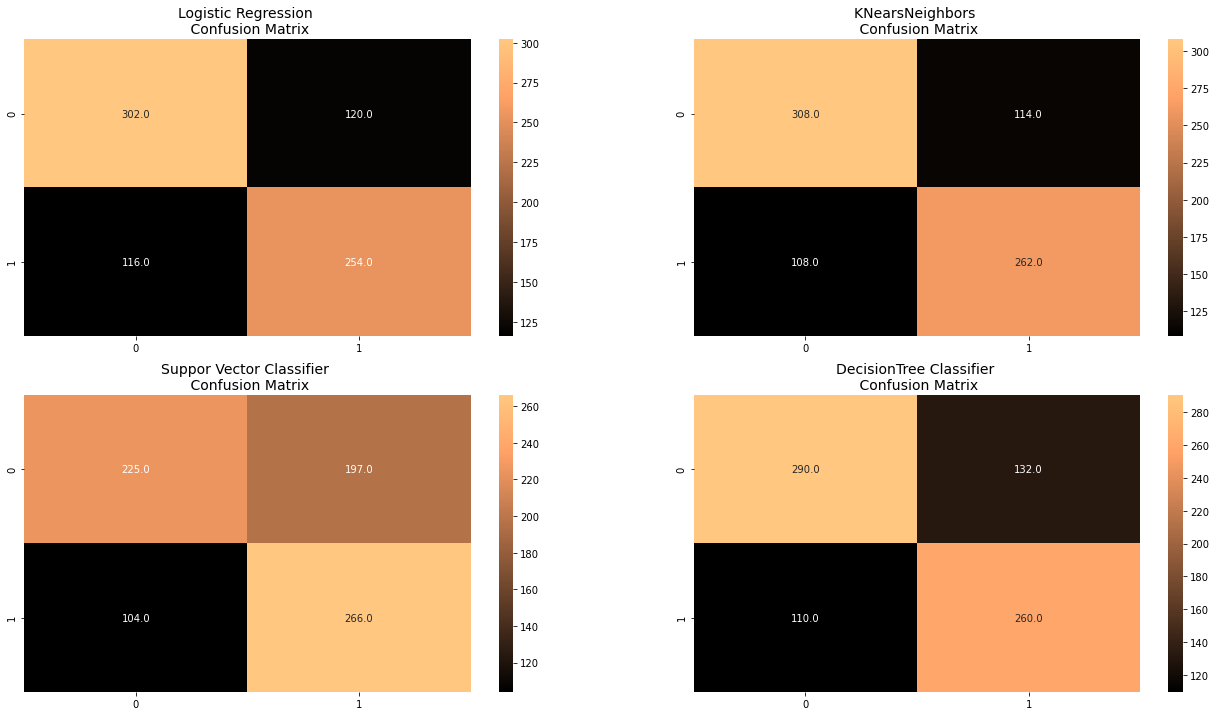

In [79]:
log_reg_cf = confusion_matrix(y_under_test, y_pred_logreg)
knn_cf = confusion_matrix(y_under_test, y_pred_knn)
svc_cf = confusion_matrix(y_under_test, y_pred_svc)
dt_cf = confusion_matrix(y_under_test, y_pred_dt)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper, fmt = ".1f")
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)


sns.heatmap(knn_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper, fmt = ".1f")
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper, fmt = ".1f")
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)


sns.heatmap(dt_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper, fmt = ".1f")
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

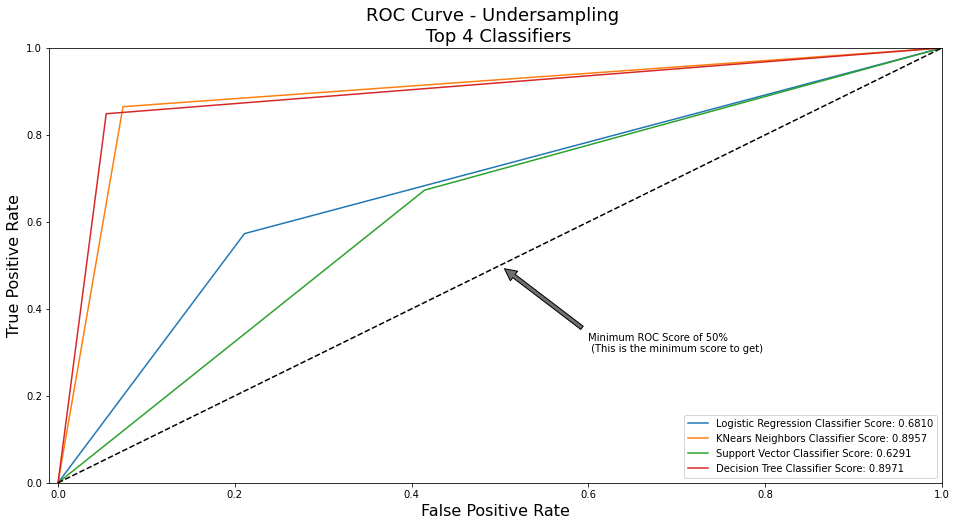

In [178]:
log_fpr, log_tpr, log_thresold = roc_curve(y_under_test, y_pred_logreg)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_under_test, y_pred_knn)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_under_test, y_pred_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_under_test, y_pred_dt)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve - Undersampling \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_under_test, y_pred_logreg)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_under_test, y_pred_knn)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_under_test, y_pred_svc)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_under_test,  y_pred_dt)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Oversampling using SMOTE

In [220]:
X = df[features]
y = df['Churn']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
sm = SMOTE(random_state=25, sampling_strategy = 1.0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_val_res, y_val_res = sm.fit_resample(X_val, y_val)

In [224]:
for key, classifier in classifiers.items():
    classifier.fit(X_train_res, y_train_res)
    accuracy = cross_val_score(classifier, X_train_res, y_train_res, scoring = 'accuracy',cv=5)
    print("Classifiers: ", classifier.__class__.__name__, 
          "Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Classifiers:  LogisticRegression Accuracy of Model with Cross Validation is: 73.20717131474103
Classifiers:  KNeighborsClassifier Accuracy of Model with Cross Validation is: 76.15537848605578
Classifiers:  SVC Accuracy of Model with Cross Validation is: 60.2390438247012
Classifiers:  DecisionTreeClassifier Accuracy of Model with Cross Validation is: 84.26294820717132


In [225]:
grid_log_reg.fit(X_train_res, y_train_res)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

log_reg_score = cross_val_score(log_reg, X_val_res, y_val_res, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  72.55%


In [226]:
grid_knears.fit(X_train_res, y_train_res)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

knears_score = cross_val_score(knears_neighbors, X_val_res, y_val_res, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 78.0%


In [227]:
grid_svc.fit(X_train_res, y_train_res)

# SVC best estimator
svc = grid_svc.best_estimator_

svc_score = cross_val_score(svc, X_val_res, y_val_res, cv=3)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 60.64%


In [228]:
grid_dt.fit(X_train_res, y_train_res)

# DT best estimator
dt = grid_dt.best_estimator_

dt_score = cross_val_score(dt, X_val_res, y_val_res, cv=5)
print('Decision Tree Classifier Cross Validation Score', round(dt_score.mean() * 100, 2).astype(str) + '%')

Decision Tree Classifier Cross Validation Score 82.23%


In [229]:
y_pred_logreg_sm = log_reg.predict(X_test)
y_pred_knn_sm = knears_neighbors.predict(X_test)
y_pred_svc_sm = svc.predict(X_test)
y_pred_dt_sm = dt.predict(X_test)

print('Logistic Regression - F1-score: ', f1_score(y_test,y_pred_logreg_sm))
print('Knn - F1-score: ', f1_score(y_test,y_pred_knn_sm))
print('SVC - F1-score: ', f1_score(y_test,y_pred_svc_sm))
print('DT - F1-score: ', f1_score(y_test,y_pred_dt_sm))


Logistic Regression - F1-score:  0.5443037974683544
Knn - F1-score:  0.6649874055415617
SVC - F1-score:  0.48557213930348253
DT - F1-score:  0.7315789473684211


In [230]:
print('Logistic Regression - accuracy: ', accuracy_score(y_test,y_pred_logreg_sm))
print('Knn - accuracy: ', accuracy_score(y_test,y_pred_knn_sm))
print('SVC - accuracy: ', accuracy_score(y_test,y_pred_svc_sm))
print('DT - accuracy: ', accuracy_score(y_test,y_pred_dt_sm))

Logistic Regression - accuracy:  0.7087378640776699
Knn - accuracy:  0.7847896440129449
SVC - accuracy:  0.5817152103559871
DT - accuracy:  0.8349514563106796


In [231]:
print('Logistic Regression - Recall: ', recall_score(y_test,y_pred_logreg_sm))
print('Knn - Recall: ', recall_score(y_test,y_pred_knn_sm))
print('SVC - Recall: ', recall_score(y_test,y_pred_svc_sm))
print('DT - Recall: ', recall_score(y_test,y_pred_dt_sm))

Logistic Regression - Recall:  0.5569948186528497
Knn - Recall:  0.6839378238341969
SVC - Recall:  0.6321243523316062
DT - Recall:  0.7202072538860104


In [232]:
print('Logistic Regression - ROC-AUC score: ', roc_auc_score(y_test,y_pred_logreg_sm))
print('Knn - ROC-AUC score: ', roc_auc_score(y_test,y_pred_knn_sm))
print('SVC - ROC-AUC score: ', roc_auc_score(y_test,y_pred_svc_sm))
print('DT - ROC-AUC score: ', roc_auc_score(y_test,y_pred_dt_sm))

Logistic Regression - ROC-AUC score:  0.6673209387381895
Knn - ROC-AUC score:  0.7572630295641573
SVC - ROC-AUC score:  0.5954739408716855
DT - ROC-AUC score:  0.8036330387077111


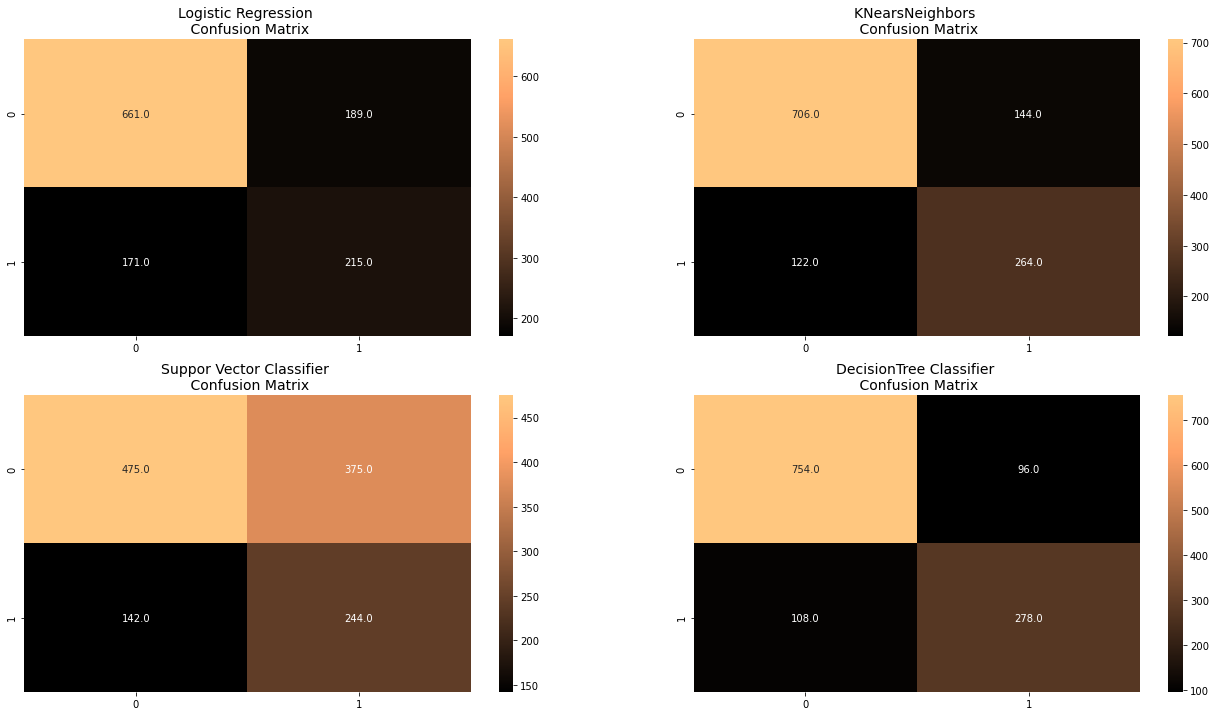

In [233]:
log_reg_cf = confusion_matrix(y_test, y_pred_logreg_sm)
knn_cf = confusion_matrix(y_test, y_pred_knn_sm)
svc_cf = confusion_matrix(y_test, y_pred_svc_sm)
dt_cf = confusion_matrix(y_test, y_pred_dt_sm)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper, fmt = ".1f")
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)


sns.heatmap(knn_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper, fmt = ".1f")
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper, fmt = ".1f")
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)


sns.heatmap(dt_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper, fmt = ".1f")
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

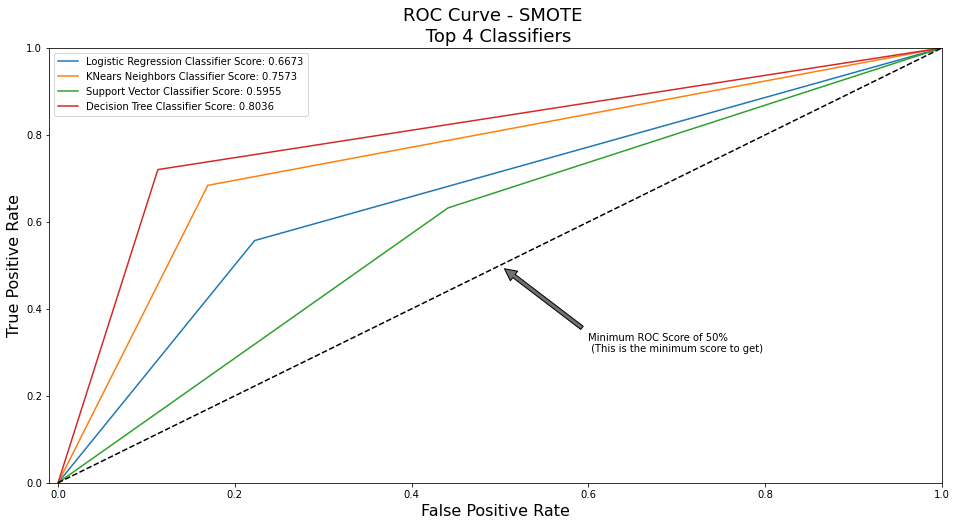

In [234]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_logreg_sm)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, y_pred_knn_sm)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc_sm)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_pred_dt_sm)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve - SMOTE \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_logreg_sm)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_knn_sm)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc_sm)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test,  y_pred_dt_sm)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [235]:
undersample_score = [accuracy_score(y_under_test, y_pred_logreg), accuracy_score(y_under_test, y_pred_knn),
                        accuracy_score(y_under_test, y_pred_svc), accuracy_score(y_under_test, y_pred_dt)]

In [128]:
oversample_score = [accuracy_score(y_test, y_pred_logreg_sm), accuracy_score(y_test, y_pred_knn_sm),
                    accuracy_score(y_test, y_pred_svc_sm), accuracy_score(y_test, y_pred_dt_sm)]



In [130]:
d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
                    
final_df = pd.DataFrame(data=d)

# Move column
#score = final_df['Score']
#final_df.drop('Score', axis=1, inplace=True)
#final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,"[0.6881313131313131, 0.8977272727272727, 0.626..."
1,Oversampling (SMOTE),"[0.7087378640776699, 0.7847896440129449, 0.581..."


In [132]:
#pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [2]:
from prettytable import PrettyTable 

In [3]:
myTable = PrettyTable(["Model", "Technique", "Accuracy Score", "F1-Score", "ROC-AUC Score"])

myTable.add_row(["Logistic Regression", "Random Undersampling", accuracy_score(y_under_test, y_pred_logreg),
                f1_score(y_under_test, y_pred_logreg), roc_auc_score(y_under_test, y_pred_logreg)])
myTable.add_row(["Logistic Regression", "Oversampling (SMOTE)", accuracy_score(y_test, y_pred_logreg_sm),
                f1_score(y_test, y_pred_logreg_sm), roc_auc_score(y_test, y_pred_logreg_sm)])   
myTable.add_row(["KNN", "Random Undersampling", accuracy_score(y_under_test, y_pred_knn),
                f1_score(y_under_test, y_pred_knn), roc_auc_score(y_under_test, y_pred_knn)])
myTable.add_row(["KNN", "Oversampling (SMOTE)", accuracy_score(y_test, y_pred_knn_sm),
                f1_score(y_test, y_pred_knn_sm), roc_auc_score(y_test, y_pred_knn_sm)])
myTable.add_row(["Decision Tree", "Random Undersampling", accuracy_score(y_under_test, y_pred_dt),
                f1_score(y_under_test, y_pred_dt), roc_auc_score(y_under_test, y_pred_dt), recall_score(y_under_test, y_pred_dt)])
myTable.add_row(["Decision Tree", "Oversampling (SMOTE)", accuracy_score(y_test, y_pred_dt_sm),
                f1_score(y_test, y_pred_dt_sm), roc_auc_score(y_test, y_pred_dt_sm), recall_score(y_test, y_pred_dt_sm)])
myTable.add_row(["SVC", "Random Undersampling", accuracy_score(y_under_test, y_pred_svc),
                f1_score(y_under_test, y_pred_svc), roc_auc_score(y_under_test, y_pred_svc), recall_score(y_under_test, y_pred_svc)])
myTable.add_row(["SVC", "Oversampling (SMOTE)", accuracy_score(y_test, y_pred_svc_sm),
                f1_score(y_test, y_pred_svc_sm), roc_auc_score(y_test, y_pred_svc_sm), recall_score(y_test, y_pred_svc_sm)])

print(myTable)

NameError: name 'accuracy_score' is not defined

In [238]:
myTable1 = PrettyTable(["Model", "Technique", "Accuracy Score", "F1-Score", "ROC-AUC Score"])

myTable1.add_row(["KNN", "Random Undersampling", accuracy_score(y_under_test, y_pred_knn),
                f1_score(y_under_test, y_pred_knn), roc_auc_score(y_under_test, y_pred_knn)])
myTable1.add_row(["KNN", "Oversampling (SMOTE)", accuracy_score(y_test, y_pred_knn_sm),
                f1_score(y_test, y_pred_knn_sm), roc_auc_score(y_test, y_pred_knn_sm)])                      

print(myTable1)

+-------+----------------------+--------------------+--------------------+--------------------+
| Model |      Technique       |   Accuracy Score   |      F1-Score      |   ROC-AUC Score    |
+-------+----------------------+--------------------+--------------------+--------------------+
|  KNN  | Random Undersampling | 0.8977272727272727 | 0.8876560332871013 | 0.8957025746125272 |
|  KNN  | Oversampling (SMOTE) | 0.7847896440129449 | 0.6649874055415617 | 0.7572630295641573 |
+-------+----------------------+--------------------+--------------------+--------------------+


In [239]:
myTable2 = PrettyTable(["Model", "Technique", "Accuracy Score", "F1-Score", "ROC-AUC Score", "Recall"])

myTable2.add_row(["Decision Tree", "Random Undersampling", accuracy_score(y_under_test, y_pred_dt),
                f1_score(y_under_test, y_pred_dt), roc_auc_score(y_under_test, y_pred_dt), recall_score(y_under_test, y_pred_dt)])
myTable2.add_row(["Decision Tree", "Oversampling (SMOTE)", accuracy_score(y_test, y_pred_dt_sm),
                f1_score(y_test, y_pred_dt_sm), roc_auc_score(y_test, y_pred_dt_sm), recall_score(y_test, y_pred_dt_sm)])                      

print(myTable2)

+---------------+----------------------+--------------------+--------------------+--------------------+--------------------+
|     Model     |      Technique       |   Accuracy Score   |      F1-Score      |   ROC-AUC Score    |       Recall       |
+---------------+----------------------+--------------------+--------------------+--------------------+--------------------+
| Decision Tree | Random Undersampling | 0.9002525252525253 | 0.8882602545968882 | 0.8970731394902012 | 0.8486486486486486 |
| Decision Tree | Oversampling (SMOTE) | 0.8349514563106796 | 0.7315789473684211 | 0.8036330387077111 | 0.7202072538860104 |
+---------------+----------------------+--------------------+--------------------+--------------------+--------------------+


In [240]:
myTable3 = PrettyTable(["Model", "Technique", "Accuracy Score", "F1-Score", "ROC-AUC Score", "Recall"])

myTable3.add_row(["SVC", "Random Undersampling", accuracy_score(y_under_test, y_pred_svc),
                f1_score(y_under_test, y_pred_svc), roc_auc_score(y_under_test, y_pred_svc), recall_score(y_under_test, y_pred_svc)])
myTable3.add_row(["SVC", "Oversampling (SMOTE)", accuracy_score(y_test, y_pred_svc_sm),
                f1_score(y_test, y_pred_svc_sm), roc_auc_score(y_test, y_pred_svc_sm), recall_score(y_test, y_pred_svc_sm)])                      

print(myTable3)

+-------+----------------------+--------------------+---------------------+--------------------+--------------------+
| Model |      Technique       |   Accuracy Score   |       F1-Score      |   ROC-AUC Score    |       Recall       |
+-------+----------------------+--------------------+---------------------+--------------------+--------------------+
|  SVC  | Random Undersampling | 0.6262626262626263 |  0.6272040302267002 | 0.6291405149225054 | 0.672972972972973  |
|  SVC  | Oversampling (SMOTE) | 0.5817152103559871 | 0.48557213930348253 | 0.5954739408716855 | 0.6321243523316062 |
+-------+----------------------+--------------------+---------------------+--------------------+--------------------+


In [186]:
#pip install xgboost

In [241]:
from xgboost import XGBClassifier

In [244]:
model = XGBClassifier()


In [251]:
X_train_res.head()

,Modality_0,Modality_1,Modality_2,Modality_3,Modality_4,Market_0,Market_1,Market_2,Market_3,Market_4,...,Sales Quartile_Q1,Sales Quartile_Q2,Sales Quartile_Q3,Sales Quartile_Q4,Partner Type_0,Partner Type_1,Partner Type_2,Partner Type_3,Partner Type_4,EOL_Reached
0,0,0,1,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,1,1,0.0
1,0,0,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0.0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0.0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0.0
4,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0.0


In [258]:
X_train_res['EOL_Reached'] = X_train_res['EOL_Reached'].astype(int)

In [259]:
model.fit(X_train_res, y_train_res)

[18:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [260]:
y_pred = model.predict(X_test)

In [261]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.22%
